# Analisi: se gli NFT hanno influenzato i tweet
Analisi dei giorni tra la data inizio variazione e fine variazione dei picchi NFT con 3 giorni successivi (sia positivi che negativi) esaminando anche la sentiment analysis dei tweet e il punteggio totale (di ogni singolo tweet) che mi serve a capire quali sono stati i tweet più influenti

### Importazione librerie e dataframes

In [13]:
import pandas as pd
from datetime import datetime
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [14]:
top_nft_positivi = pd.read_csv("../dataframes/top_nft_positivi_df.csv")
top_nft_negativi = pd.read_csv("../dataframes/top_nft_negativi_df.csv")
tweets_sentiment = pd.read_csv("../dataframes/tweets_sentiment_df.csv") 
tweets_collection = pd.read_csv("../datasets/twitter/twitter_tweet_collection.csv")

# Converti le colonne delle date in formato datetime
top_nft_positivi['data_inizio'] = pd.to_datetime(top_nft_positivi['data_inizio'])
top_nft_negativi['data_inizio'] = pd.to_datetime(top_nft_negativi['data_inizio'])
top_nft_positivi['data_fine'] = pd.to_datetime(top_nft_positivi['data_fine'])
top_nft_negativi['data_fine'] = pd.to_datetime(top_nft_negativi['data_fine'])
tweets_sentiment['created_at'] = pd.to_datetime(tweets_sentiment['created_at'])

### Grafici picchi positivi

Elaborazione picco positivo NFT 0


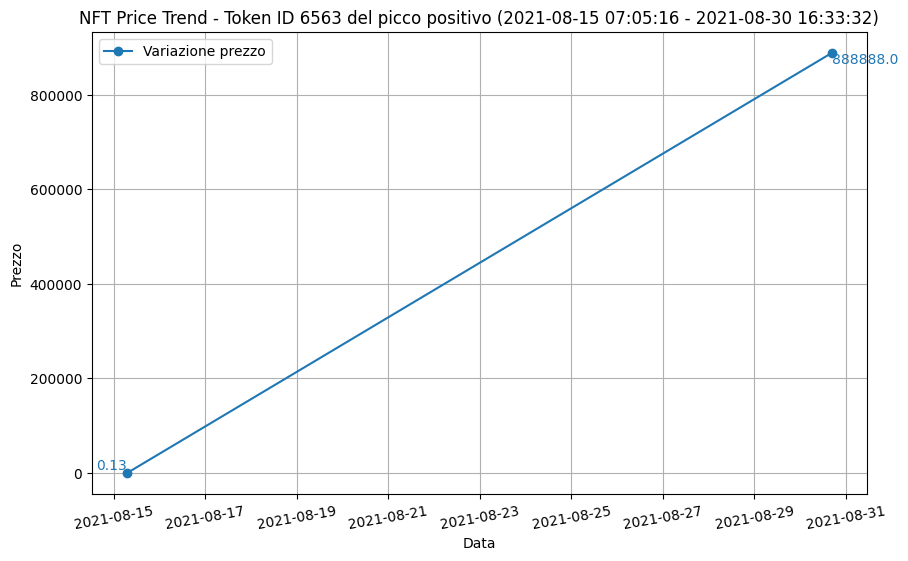

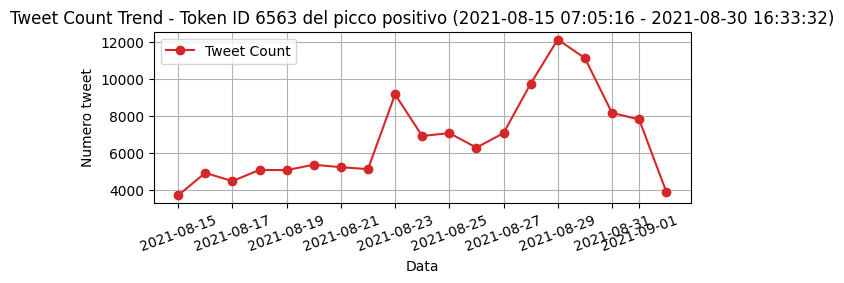

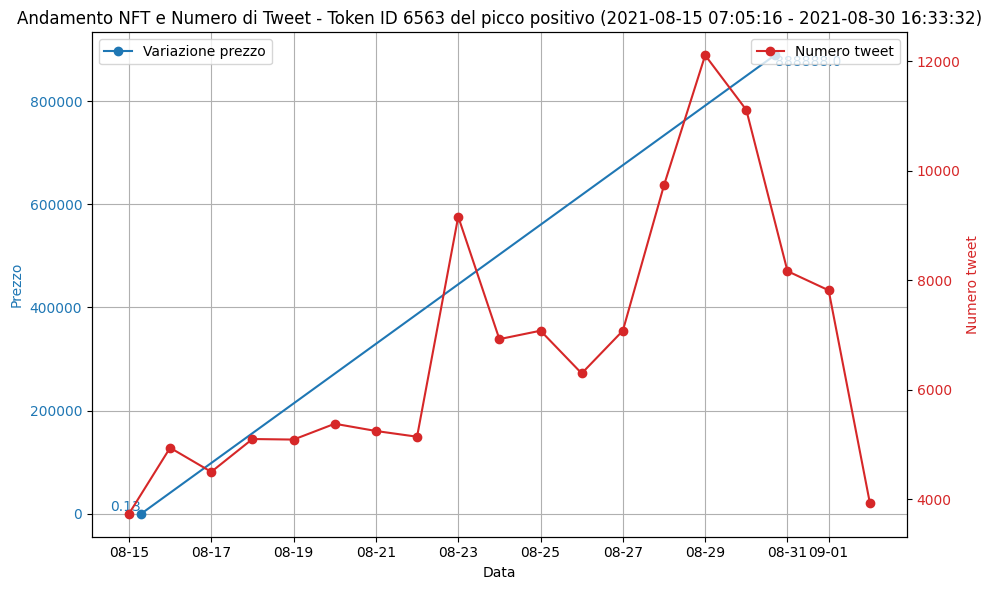

Elaborazione picco positivo NFT 1


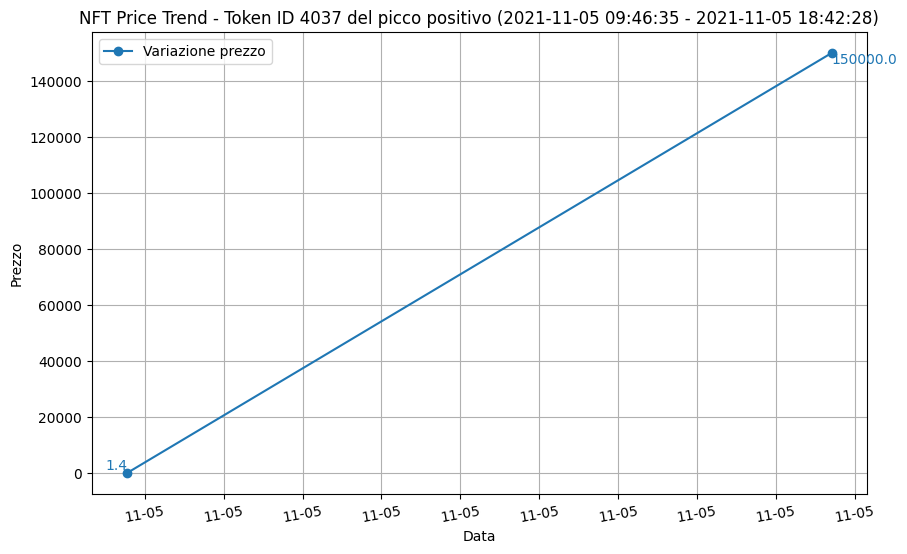

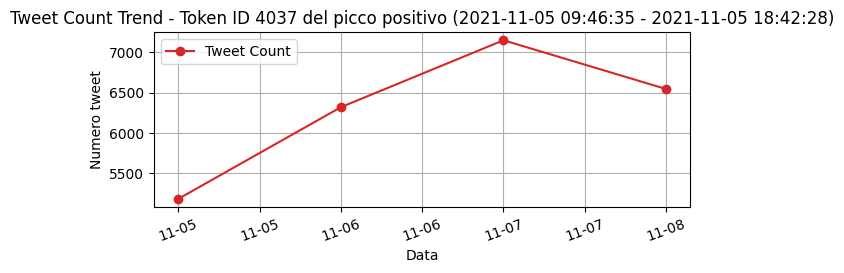

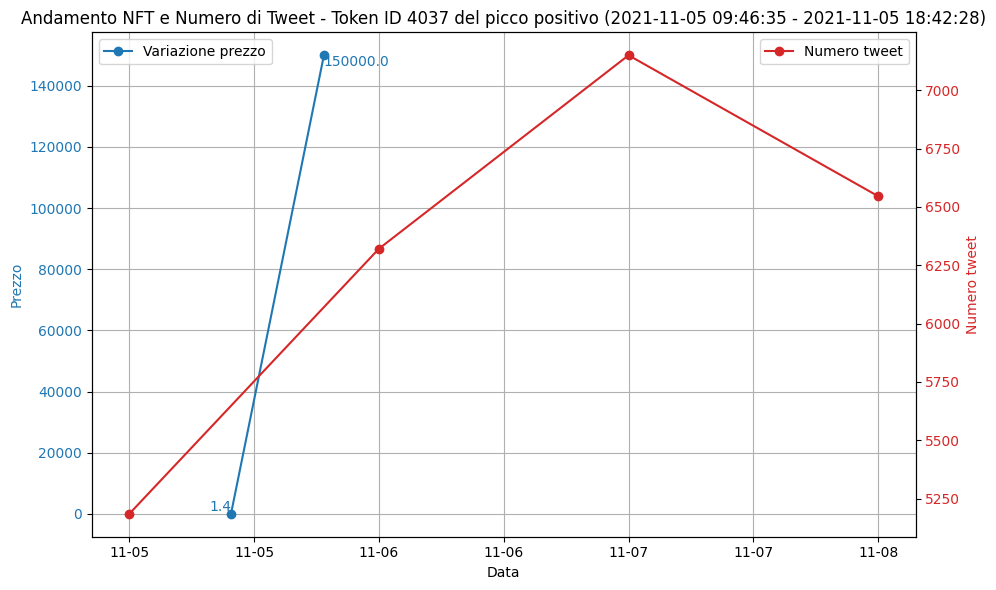

Elaborazione picco positivo NFT 2


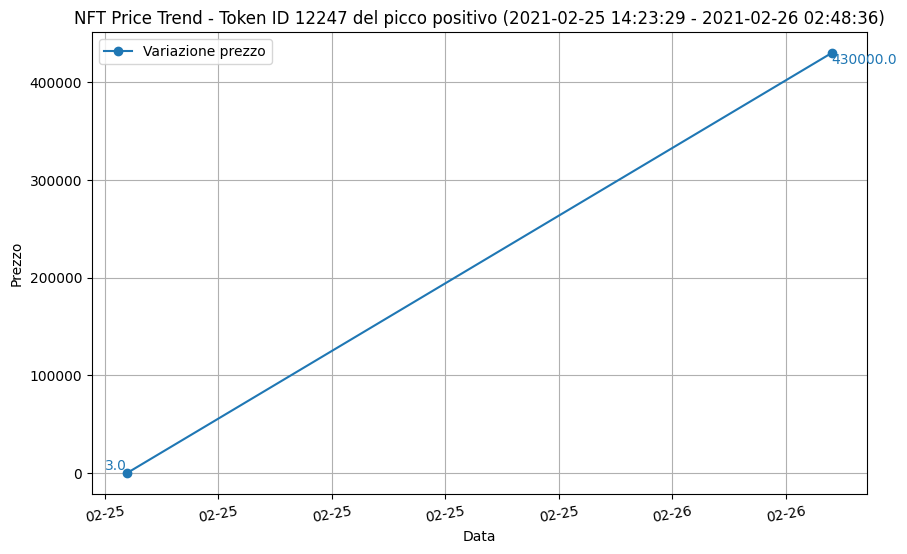

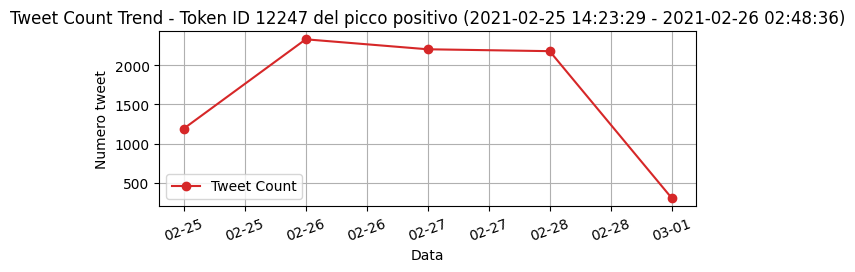

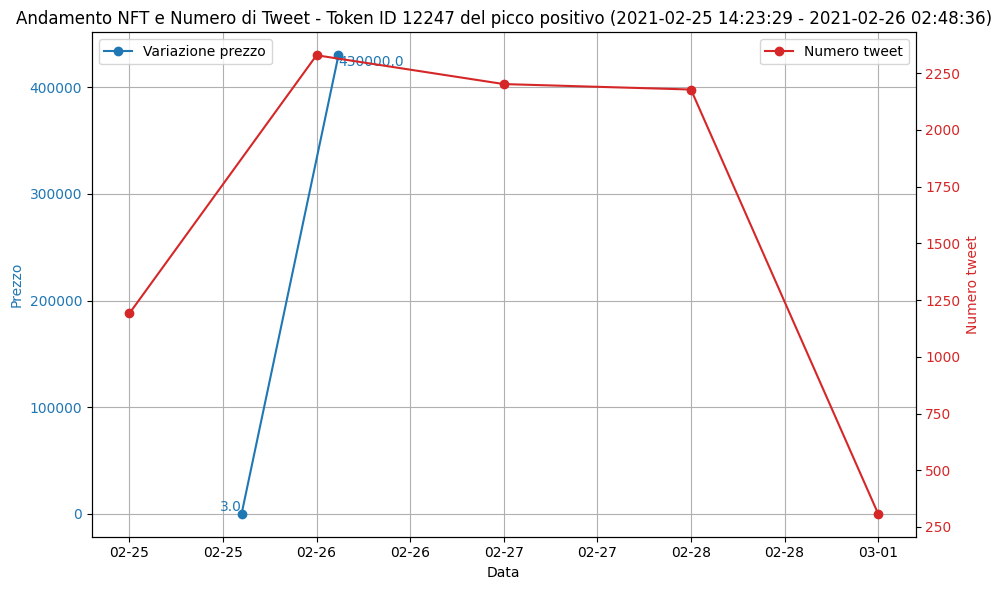

Elaborazione picco positivo NFT 3


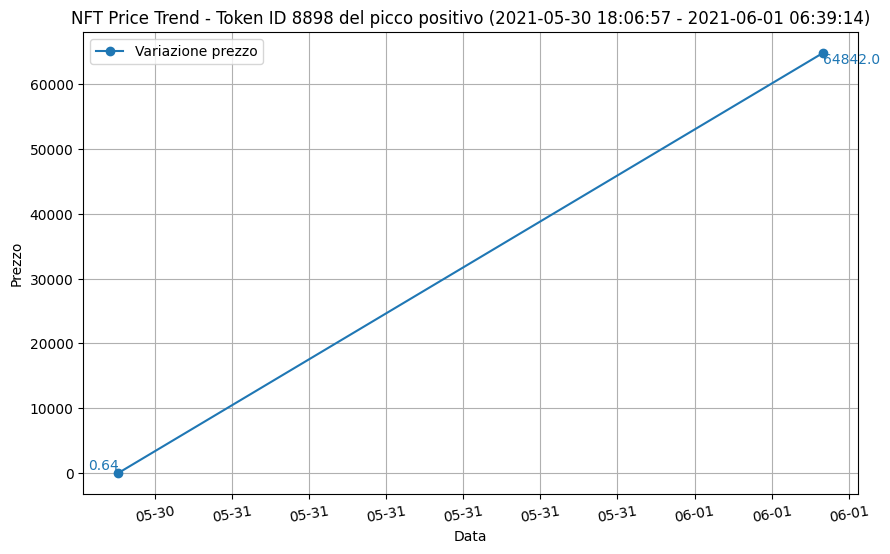

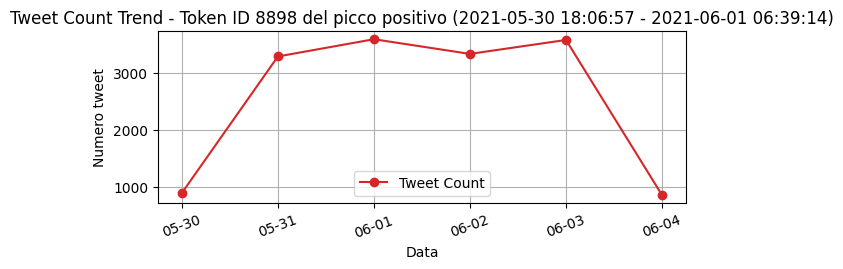

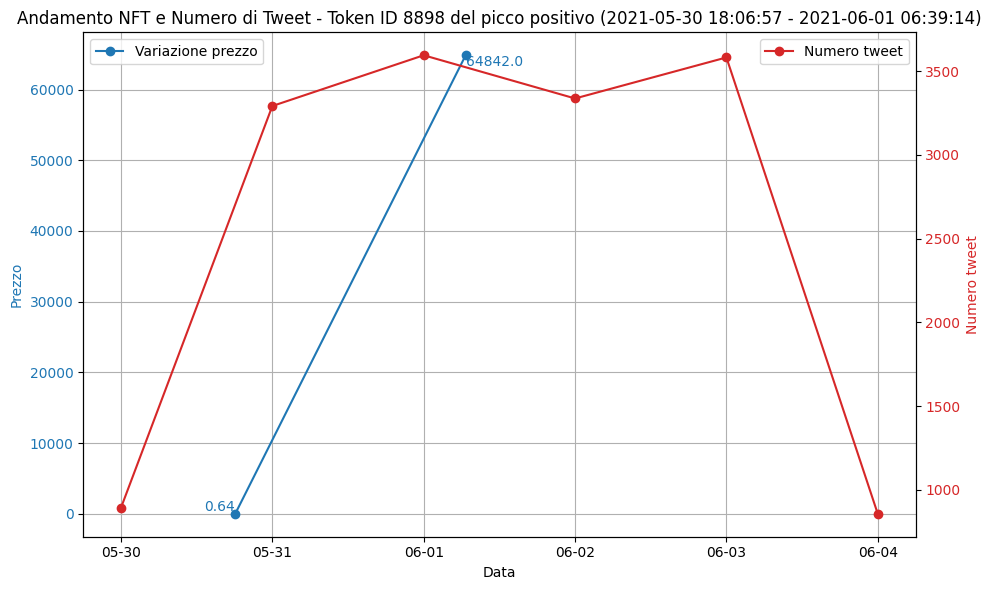

Elaborazione picco positivo NFT 4


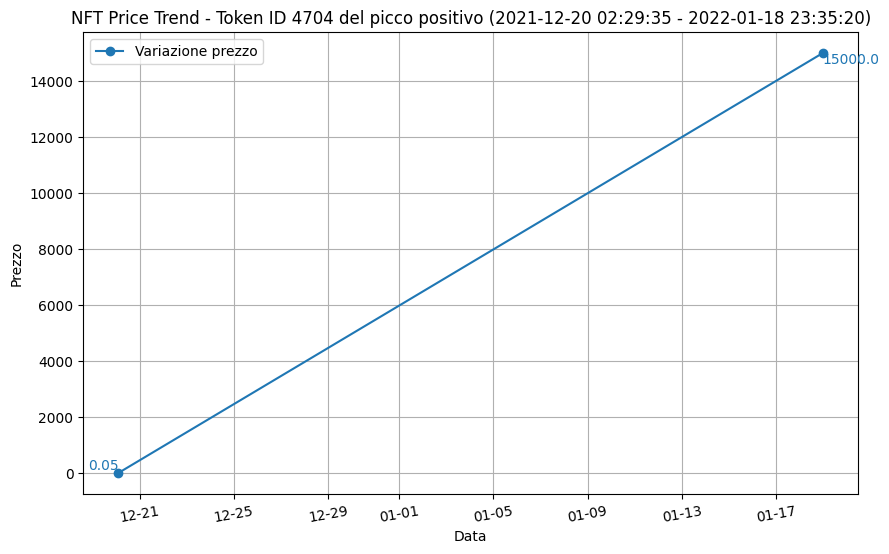

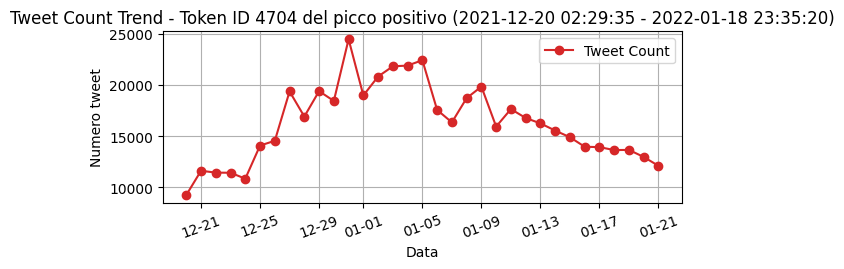

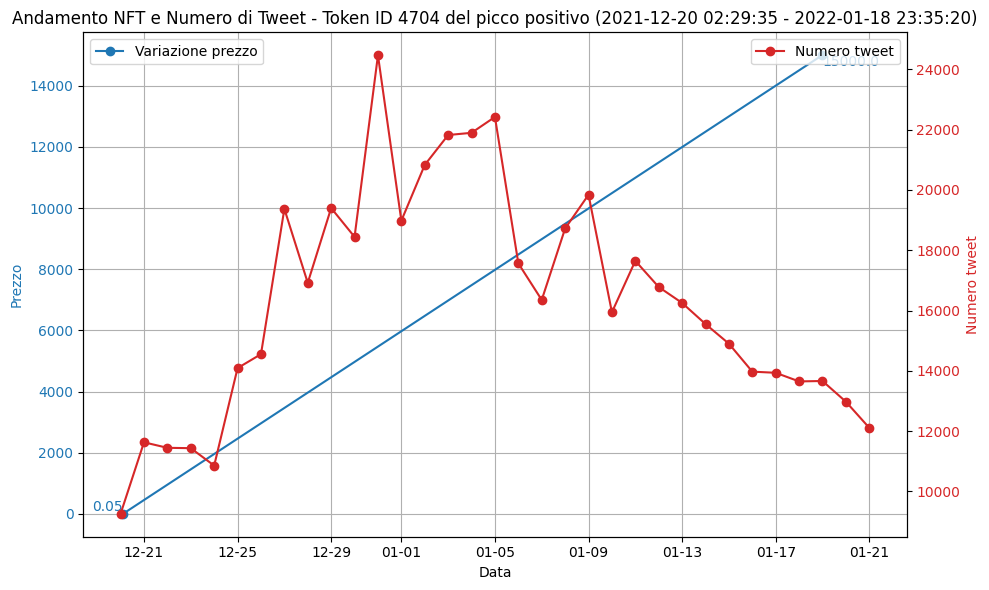

In [15]:
num_tweet_per_picco = []
variazioni_prezzo_per_picco = []
picchi_calcolati = 0
risultati_correlazione = {}
date_formatter = DateFormatter('%Y-%m-%d') 

# Iterazione su ciascun picco positivo di NFT
for index, row in top_nft_positivi.iterrows():
    print(f"Elaborazione picco positivo NFT {index}")
    
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    prezzo_inizio = row['prezzo_inizio']
    prezzo_fine = row['prezzo_fine']
    token_id = row['token_id']
    
    # Filtra i tweet che sono stati fatti nei giorni successivi all'inizio della variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_variazione) & 
        (tweets_sentiment['created_at'] <= data_fine_variazione + pd.DateOffset(days=3)) 
    ]
    
    # Conta il numero totale di tweet per questo picco positivo
    numero_totale_tweet = len(tweets_filtrati)
    
    # Aggiungi la variazione percentuale del prezzo per questo picco
    variazione_prezzo = row['percentuale_variazione']
    
    # Aggiungi i dati alla lista per l'analisi di correlazione
    num_tweet_per_picco.append(numero_totale_tweet)
    variazioni_prezzo_per_picco.append(variazione_prezzo)
    
    plt.figure(figsize=(10,6))
    
    # Creiamo una lista di date e prezzi
    dates = [data_inizio_variazione, data_fine_variazione]
    prices = [prezzo_inizio, prezzo_fine]

    # Grafico NFT price trend
    plt.plot(dates, prices, marker='o', linestyle='-', label=f'Variazione prezzo')
    plt.title(f'NFT Price Trend - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.text(data_inizio_variazione, prezzo_inizio, f'{prezzo_inizio}', ha='right', va='bottom', fontsize=10, color='tab:blue')
    plt.text(data_fine_variazione, prezzo_fine, f'{prezzo_fine}', ha='left', va='top', fontsize=10, color='tab:blue')
    plt.xlabel('Data')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_formatter(date_formatter) 
    plt.xticks(rotation=10) 
    plt.show()
    # plt.tight_layout()
    
    # Grafico tweet count trend
    plt.subplot(2, 1, 2)
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Tweet Count')
    plt.title(f'Tweet Count Trend - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    plt.ylabel('Numero tweet')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=20) 
    plt.tight_layout()
    plt.gca().get_xaxis().set_major_formatter(date_formatter)
    plt.show()
    
    # Grafico combinato
    fig, ax1 = plt.subplots(figsize=(10, 6)) 

    # Plot per il prezzo NFT
    ax1.plot(dates, prices, marker='o', linestyle='-', color='tab:blue', label='Variazione prezzo')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Prezzo', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.text(data_inizio_variazione, prezzo_inizio, f'{prezzo_inizio}', ha='right', va='bottom', fontsize=10, color='tab:blue')
    ax1.text(data_fine_variazione, prezzo_fine, f'{prezzo_fine}', ha='left', va='top', fontsize=10, color='tab:blue')

    # Secondo asse per il conteggio dei tweet
    ax2 = ax1.twinx()
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    ax2.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Numero tweet')
    ax2.set_ylabel('Numero tweet', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')

    plt.title(f'Andamento NFT e Numero di Tweet - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')

    date_formatter = DateFormatter('%m-%d')  
    ax1.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=45)
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

### Grafici picchi negativi

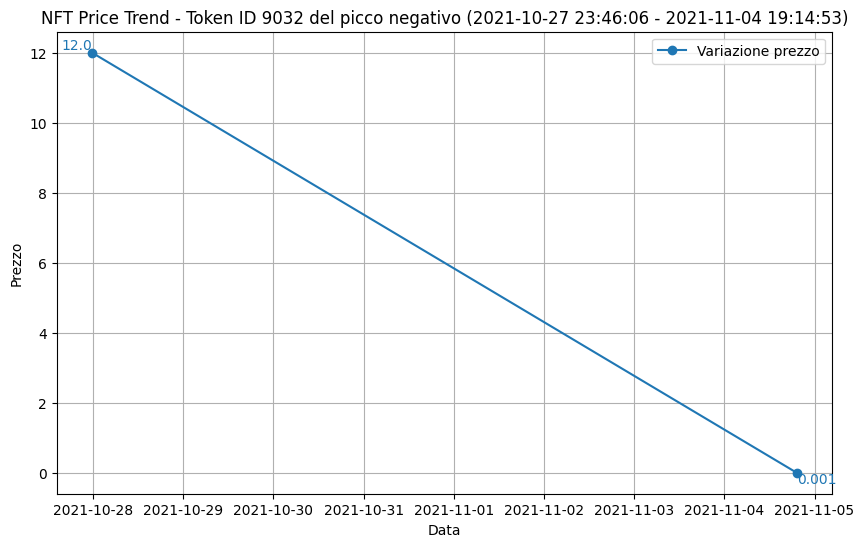

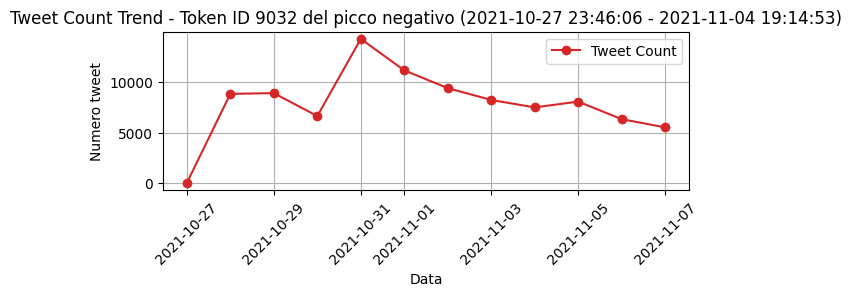

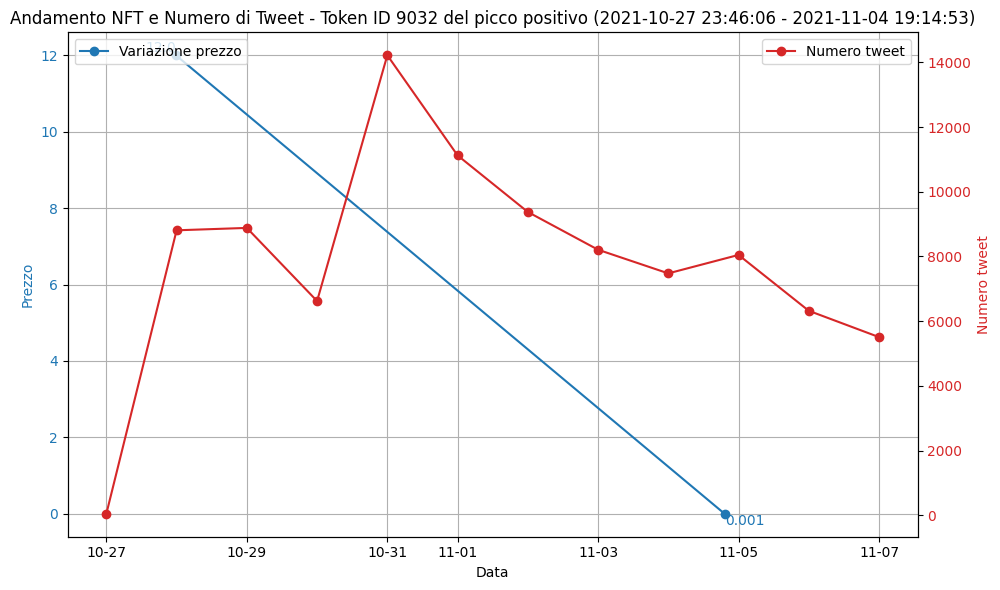

In [16]:
num_tweet_per_picco = []
variazioni_prezzo_per_picco = []
picchi_calcolati = 0
risultati_correlazione = {}
date_formatter = DateFormatter('%Y-%m-%d') 

# Iterazione su ciascun picco positivo di NFT
for index, row in top_nft_negativi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    prezzo_inizio = row['prezzo_inizio']
    prezzo_fine = row['prezzo_fine']
    token_id = row['token_id']
    
    # Filtra i tweet che sono stati fatti nei giorni successivi all'inizio della variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_variazione) & 
        (tweets_sentiment['created_at'] <= data_fine_variazione + pd.DateOffset(days=3)) 
    ]
    
    # Conta il numero totale di tweet per questo picco positivo
    numero_totale_tweet = len(tweets_filtrati)
    
    # Aggiungi la variazione percentuale del prezzo per questo picco
    variazione_prezzo = row['percentuale_variazione']
    
    # Aggiungi i dati alla lista per l'analisi di correlazione
    num_tweet_per_picco.append(numero_totale_tweet)
    variazioni_prezzo_per_picco.append(variazione_prezzo)
    
    plt.figure(figsize=(10,6))

    # Creiamo una lista di date e prezzi
    dates = [data_inizio_variazione, data_fine_variazione]
    prices = [prezzo_inizio, prezzo_fine]

    # Grafico NFT price trend
    plt.plot(dates, prices, marker='o', linestyle='-', label=f'Variazione prezzo')
    plt.title(f'NFT Price Trend - Token ID {token_id} del picco negativo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.text(data_inizio_variazione, prezzo_inizio, f'{prezzo_inizio}', ha='right', va='bottom', fontsize=10, color='tab:blue')
    plt.text(data_fine_variazione, prezzo_fine, f'{prezzo_fine}', ha='left', va='top', fontsize=10, color='tab:blue')
    plt.xlabel('Data')
    plt.ylabel('Prezzo')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Grafico tweet count trend
    plt.subplot(2, 1, 2)
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    plt.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Tweet Count')
    plt.title(f'Tweet Count Trend - Token ID {token_id} del picco negativo ({data_inizio_variazione} - {data_fine_variazione})')
    plt.xlabel('Data')
    # plt.scatter(tweet_counts['created_at'].dt.strftime('%d-%m'))
    plt.ylabel('Numero tweet')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

    # Grafico combinato
    fig, ax1 = plt.subplots(figsize=(10, 6)) 

    # Plot per il prezzo NFT
    ax1.plot(dates, prices, marker='o', linestyle='-', color='tab:blue', label='Variazione prezzo')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Prezzo', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')
    ax1.text(data_inizio_variazione, prezzo_inizio, f'{prezzo_inizio}', ha='right', va='bottom', fontsize=10, color='tab:blue')
    ax1.text(data_fine_variazione, prezzo_fine, f'{prezzo_fine}', ha='left', va='top', fontsize=10, color='tab:blue')

    # Secondo asse per il conteggio dei tweet
    ax2 = ax1.twinx()
    tweet_counts = tweets_filtrati.resample('D', on='created_at').size()
    ax2.plot(tweet_counts.index, tweet_counts.values, marker='o', linestyle='-', color='tab:red', label='Numero tweet')
    ax2.set_ylabel('Numero tweet', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')

    plt.title(f'Andamento NFT e Numero di Tweet - Token ID {token_id} del picco positivo ({data_inizio_variazione} - {data_fine_variazione})')
    date_formatter = DateFormatter('%m-%d')  
    ax1.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=20)
    ax1.grid(True)
    fig.tight_layout()
    plt.show()

## correlazione di pearson e p-value

la correlazione di pearson tra "variazione_percentuale_secondo" e "numero_tweets". picco per picco e il dataset globale

### nft positivi

In [23]:
# Lista per raccogliere il numero di tweet per ogni picco positivo
num_tweet_per_picco = []

# Itera su ciascuna riga del dataset top_nft_positivi
for index, row in top_nft_positivi.iterrows():
    data_inizio_variazione = row['data_inizio']
    data_fine_variazione = row['data_fine']
    
    # Filtra i tweet che sono stati fatti nei giorni successivi all'inizio della variazione fino a 3 giorni dopo la fine della variazione
    tweets_filtrati = tweets_sentiment[
        (tweets_sentiment['created_at'] >= data_inizio_variazione) & 
        (tweets_sentiment['created_at'] <= data_fine_variazione + pd.DateOffset(days=3))
    ]
    
    numero_totale_tweet = len(tweets_filtrati)
    num_tweet_per_picco.append(numero_totale_tweet)

top_nft_positivi['numero_tweets'] = num_tweet_per_picco

# Liste per memorizzare i risultati della correlazione locale
corr_pearson_list = []
p_value_list = []

# Itera su ciascuna riga del dataset top_nft_positivi per calcolare la correlazione locale
for index, row in top_nft_positivi.iterrows():
    # Definisci una finestra attorno all'indice corrente (ad esempio, 2 righe prima e 2 righe dopo)
    start_index = max(0, index - 2)
    end_index = min(len(top_nft_positivi), index + 3)  # +3 per includere la riga corrente e due righe successive
    
    # Estrai il sotto-dataset per la finestra corrente
    window_df = top_nft_positivi.iloc[start_index:end_index]
    
    # Calcola la correlazione di Pearson per la finestra corrente
    if len(window_df) > 1:  # Calcola la correlazione solo se ci sono almeno 2 righe nella finestra
        correlation, p_value = pearsonr(window_df['variazione_per_sec'], window_df['numero_tweets'])
    else:
        correlation, p_value = (None, None)  # Se non ci sono abbastanza dati, imposta come None
    
    corr_pearson_list.append(correlation)
    p_value_list.append(p_value)

# Aggiungi le liste come nuove colonne al dataset top_nft_positivi
top_nft_positivi['corr_pearson'] = corr_pearson_list
top_nft_positivi['p-value'] = p_value_list

# Calcola la correlazione di Pearson per l'intero dataset
overall_correlation, overall_p_value = pearsonr(top_nft_positivi['variazione_per_sec'], top_nft_positivi['numero_tweets'])

print(top_nft_positivi)
print(f"Correlazione di Pearson (intero dataset): {overall_correlation}")
print(f"Valore p (intero dataset): {overall_p_value}")


          data_inizio           data_fine  token_id price_trend  trend_change  \
0 2021-08-15 07:05:16 2021-08-30 16:33:32      6563    positivo        136359   
1 2021-11-05 09:46:35 2021-11-05 18:42:28      4037    positivo         91506   
2 2021-02-25 14:23:29 2021-02-26 02:48:36     12247    positivo         16568   
3 2021-05-30 18:06:57 2021-06-01 06:39:14      8898    positivo        174162   
4 2021-12-20 02:29:35 2022-01-18 23:35:20      4704    positivo        103908   

   prezzo_inizio  prezzo_fine  avg_price_avg  percentuale_variazione  \
0           0.13     888888.0   42335.513029            6.837599e+08   
1           1.40     150000.0    6526.103130            1.071419e+07   
2           3.00     430000.0   63690.436667            1.433323e+07   
3           0.64      64842.0    2418.027741            1.013146e+07   
4           0.05      15000.0    3038.580333            2.999990e+07   

      durata  variazione_per_sec  numero_tweets  corr_pearson   p-value  
0  133

Nelle analisi statistiche come la correlazione di Pearson, è necessario avere almeno due punti dati (righe) per calcolare un coefficiente di correlazione significativo. Se top_nft_negativi contiene solo una riga di dati (come mostrato nel tuo output), pearsonr solleverà un errore perché non può calcolare il coefficiente di correlazione con dati insufficienti.